#Model Testing

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn import tree
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier, BalancedBaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.metrics import classification_report_imbalanced
from imblearn.combine import SMOTEENN


In [2]:
df = pd.read_csv('Resources/model_clean_data.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,26.0,0,0,0,2,0,78.05,30.8,1,0
1,1,71.0,1,0,1,2,1,108.70,31.2,2,0
2,0,46.0,0,0,1,2,1,201.42,50.8,2,0
3,0,52.0,0,0,1,2,0,124.27,22.2,2,0
4,1,67.0,0,0,1,2,0,95.48,30.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29060,0,51.0,0,0,1,0,1,226.04,27.1,1,0
29061,0,60.0,0,0,1,2,0,71.98,33.4,1,0
29062,0,45.0,0,0,0,0,0,77.45,42.2,0,0
29063,1,21.0,0,0,1,2,0,88.31,46.6,1,0


In [3]:
# Randomize the data frame
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
#Divide the target column and the features column
y = df['stroke']
X = df.drop(['stroke'], axis = 1)

In [5]:
# Split the data in training and testing using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.85, random_state=12)

In [6]:
#Scale the data using StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#Scale the data using MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_mscaled = scaler.transform(X_train)
X_test_mscaled = scaler.transform(X_test)

In [8]:
#Define test_model function that will test multiple smoteenn models.

def test_model_smot(model, data):
    X_train_smot, X_test_smot, y_train_smot, y_test_smot = data
    reg = model.fit(X_train_smot, y_train_smot)
    
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_smot, y_train_smot)}')
    print(f'Test Score: {reg.score(X_test, y_test)}\n')
    y_pred = reg.predict(X_test)
    y_true = y_test
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print('----------------------------------------------------------------')
    print(classification_report_imbalanced(y_true, y_pred))
    print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred)}')
    print('----------------------------------------------------------------')
       

In [9]:
#Define test_model function that will test multiple oversampled models.

def test_model_over(model, data):
    oversample = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over = oversample.fit_resample(X_train_scaled, y_train)
    data = X_over, X_test_scaled, y_over, y_test
    reg = model.fit(X_over, y_over)
    
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    y_pred = reg.predict(X_test_scaled)
    y_true = y_test
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_test, y_pred))
    print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}')
    print('----------------------------------------------------------------')


In [10]:
#Define test_model function that will test multiple oversampled models.

def test_model_under(model, data):
    undersample = RandomUnderSampler(sampling_strategy=0.5)
    X_under, y_under = undersample.fit_resample(X_train_scaled, y_train)
    data = X_under, X_test_scaled, y_under, y_test
    reg = model.fit(X_under, y_under)

    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    y_pred = reg.predict(X_test_scaled)
    y_true = y_test
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_test, y_pred))
    print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}')
    print('----------------------------------------------------------------')


In [71]:
# Test oversampled
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train_scaled, y_train)
data = X_over, X_test_scaled, y_over, y_test


test_model_over(LogisticRegression(), data)
test_model_over(GaussianNB(), data)
test_model_over(KNeighborsClassifier(), data)
test_model_over(AdaBoostClassifier(), data)
test_model_over(SVC(), data)
test_model_over(RandomForestClassifier(), data)
test_model_over(ExtraTreesClassifier(), data)

Model: LogisticRegression
Train score: 0.8395871281117183
Test Score: 0.846788990825688

[[3635  632]
 [  36   57]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      4267
           1       0.08      0.61      0.15        93

    accuracy                           0.85      4360
   macro avg       0.54      0.73      0.53      4360
weighted avg       0.97      0.85      0.90      4360

Balanced Accuracy: 0.7323948985840321
----------------------------------------------------------------
Model: GaussianNB
Train score: 0.8216555353167375
Test Score: 0.8247706422018348

[[3548  719]
 [  45   48]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      4267
           1       0.06      0.52      0.11        93

    accuracy                           0.82      4360
   macro avg       0.53      0.67      0.51      4360
weighted avg       0.97      0.82      0.89      4360

Balanced Accuracy:

In [72]:
#Test undersampled 
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = undersample.fit_resample(X_train_scaled, y_train)
data = X_under, X_test_scaled, y_under, y_test
test_model_under(LogisticRegression(), data)
test_model_under(GaussianNB(), data)
test_model_under(KNeighborsClassifier(), data)
test_model_under(AdaBoostClassifier(), data)
test_model_under(SVC(), data)
test_model_under(RandomForestClassifier(), data)
test_model_under(ExtraTreesClassifier(), data)

Model: LogisticRegression
Train score: 0.8397895162922485
Test Score: 0.8483944954128441

[[3640  627]
 [  34   59]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      4267
           1       0.09      0.63      0.15        93

    accuracy                           0.85      4360
   macro avg       0.54      0.74      0.53      4360
weighted avg       0.97      0.85      0.90      4360

Balanced Accuracy: 0.7437334784832839
----------------------------------------------------------------
Model: GaussianNB
Train score: 0.8252580449301761
Test Score: 0.828440366972477

[[3565  702]
 [  46   47]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4267
           1       0.06      0.51      0.11        93

    accuracy                           0.83      4360
   macro avg       0.53      0.67      0.51      4360
weighted avg       0.97      0.83      0.89      4360

Balanced Accuracy:

In [58]:
print(X.shape)
print(y.shape)
print(X_smoteenn.shape)
print(y_smoteenn.shape)

(29065, 10)
(29065,)
(51087, 10)
(51087,)


In [11]:
def test_model2(model, data):
    X_train, X_test, y_train, y_test = data
    reg = model.fit(X_train, y_train)
    
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train, y_train)}')
    print(f'Test Score: {reg.score(X_test, y_test)}\n')
    y_pred = reg.predict(X_test)
    y_true = y_test
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_test, y_pred))
    print(balanced_accuracy_score(y_test, y_pred))

In [135]:
data = X_train, X_test, y_train, y_test
test_model2(RUSBoostClassifier(), data)
test_model2(BalancedRandomForestClassifier(max_depth=2, random_state=12), data)
test_model2(BalancedBaggingClassifier(), data)


Model: RUSBoostClassifier
Train score: 0.74802671523983
Test Score: 0.75

[[3198 1070]
 [  20   72]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      4268
           1       0.06      0.78      0.12        92

    accuracy                           0.75      4360
   macro avg       0.53      0.77      0.49      4360
weighted avg       0.97      0.75      0.84      4360

0.7659528951550467
Model: BalancedRandomForestClassifier
Train score: 0.6667880995749849
Test Score: 0.6630733944954128

[[2814 1454]
 [  15   77]]
              precision    recall  f1-score   support

           0       0.99      0.66      0.79      4268
           1       0.05      0.84      0.09        92

    accuracy                           0.66      4360
   macro avg       0.52      0.75      0.44      4360
weighted avg       0.97      0.66      0.78      4360

0.7481408663053666


AttributeError: ignored

In [25]:
# Use a combination of over and under sampling called SMOTEENN
smote_enn = SMOTEENN(random_state=12)
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X, y)
X_train_smot, X_test_smot, y_train_smot, y_test_smot = train_test_split(X_smoteenn, y_smoteenn, train_size=.85 , random_state=12)

In [132]:
# Test the SMOTEENN sampled models
data = X_train_smot, X_test, y_train_smot, y_test
test_model_smot(LogisticRegression(max_iter=100000), data)
test_model_smot(GaussianNB(), data)
test_model_smot(KNeighborsClassifier(n_neighbors=7, weights='distance'), data)
test_model_smot(AdaBoostClassifier(), data)
test_model_smot(SVC(), data)
test_model_smot(RandomForestClassifier(max_depth=6, random_state=0), data)
test_model_smot(ExtraTreesClassifier(max_depth=6, random_state=0), data)
test_model_smot(XGBClassifier(objective='binary:logistic',n_estimators=10000,max_depth=6, learning_rate=.0001, n_jobs=-1), data)

Model: LogisticRegression
Train score: 0.8246781659489211
Test Score: 0.7256880733944954

[[3096 1172]
 [  24   68]]
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      4268
           1       0.05      0.74      0.10        92

    accuracy                           0.73      4360
   macro avg       0.52      0.73      0.47      4360
weighted avg       0.97      0.73      0.82      4360

----------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.73      0.74      0.84      0.73      0.54      4268
          1       0.05      0.74      0.73      0.10      0.73      0.54        92

avg / total       0.97      0.73      0.74      0.82      0.73      0.54      4360

Balanced Accuracy: 0.7322643739048939
----------------------------------------------------------------
Model: GaussianNB
Train score: 0.8110678672592866
Tes

In [23]:
# KNeighborsClassifier isa clear winner!
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
model = knn.fit(X_train_smot, y_train_smot)

In [24]:
y_pred = model.predict(X_test)
y_true = y_test
# print(f'Train score: {xgc.score(X, y)}')
# print(f'Test Score: {xgc.score(X_test_smot, y_test_smot)}\n')
print(confusion_matrix(y_true, y_pred))

print(classification_report(y_true, y_pred))
print(f'Balanced accuracy score: {balanced_accuracy_score(y_true, y_pred)}')
print(classification_report_imbalanced(y_true, y_pred))

[[3621  670]
 [   0   69]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.92      4291
           1       0.09      1.00      0.17        69

    accuracy                           0.85      4360
   macro avg       0.55      0.92      0.54      4360
weighted avg       0.99      0.85      0.90      4360

Balanced accuracy score: 0.9219296201351665
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.84      1.00      0.92      0.92      0.83      4291
          1       0.09      1.00      0.84      0.17      0.92      0.86        69

avg / total       0.99      0.85      1.00      0.90      0.92      0.83      4360



In [26]:
from matplotlib import pyplot as plt
features = sorted(zip(X.columns, model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5,10)
plt.margins(y=0.001)


ax.barh(y=cols, width=width)
plt.title('Most Predictive Features')
plt.savefig('knn_top_features.png')

plt.show()
# plt.savefig('Visualizations/balanced_most_pred.png')

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [ ]:
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=16, activation="sigmoid", input_dim=10))
# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=8, activation="sigmoid"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                176       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn_model.fit(X_under, y_under, epochs=20)

Epoch 1/20
41/41 [==============================] - 1s 2ms/step - loss: 0.6367 - accuracy: 0.6667
Epoch 2/20
41/41 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.6667
Epoch 3/20
41/41 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.6667
Epoch 4/20
41/41 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.6667
Epoch 5/20
41/41 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.6667
Epoch 6/20
41/41 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.6667
Epoch 7/20
41/41 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.6682
Epoch 8/20
41/41 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.6883
Epoch 9/20
41/41 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7162
Epoch 10/20
41/41 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7293
Epoch 11/20
41/41 [

In [ ]:
nn_model.evaluate(X_test_scaled,y_test,verbose=2)

182/182 - 0s - loss: 0.3319 - accuracy: 0.8366 - 336ms/epoch - 2ms/step


[0.33186104893684387, 0.8365731835365295]

In [ ]:
loss, acc = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.837


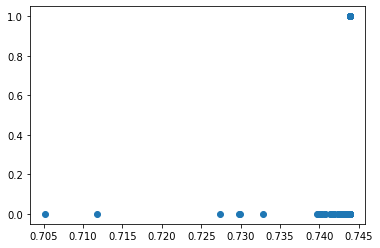

In [ ]:
plt.scatter(nn_model.predict(X_test), y_test)

In [ ]:
y_pred = nn_model.predict(X_test_scaled)
print(f'Train score: {xgc.score(X_train_scaled, y_train)}')
print(f'Test Score: {xgc.score(X_test_scaled, y_test)}\n')
# print(confusion_matrix(y_test, y_pred))
#print(classification_report_imbalanced(y_test, y_pred))
balanced_accuracy_score(y_test, y_pred)

Train score: 0.8256063994495098
Test Score: 0.8274557027352486



ValueError: ignored

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,26.0,0,0,0,2,0,78.05,30.8,1,0
1,1,71.0,1,0,1,2,1,108.70,31.2,2,0
2,0,46.0,0,0,1,2,1,201.42,50.8,2,0
3,0,52.0,0,0,1,2,0,124.27,22.2,2,0
4,1,67.0,0,0,1,2,0,95.48,30.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29060,0,51.0,0,0,1,0,1,226.04,27.1,1,0
29061,0,60.0,0,0,1,2,0,71.98,33.4,1,0
29062,0,45.0,0,0,0,0,0,77.45,42.2,0,0
29063,1,21.0,0,0,1,2,0,88.31,46.6,1,0


In [ ]:
row = [1, 13, 1, 1, 1, 2, 1, 213, 23, 1]
yhat = nn_model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 0.744
